In [1]:
import torch

from qtaim_embed.models.utils import load_graph_level_model_from_config
from qtaim_embed.utils.tests import get_dataset_graph_level
from qtaim_embed.data.dataloader import DataLoaderMoleculeGraphTask
from qtaim_embed.utils.data import get_default_graph_level_config
from qtaim_embed.core.dataset import HeteroGraphGraphLabelDataset

In [2]:
! ls ../../../data/saved_models/1119/libe/

'model_lightning_epoch=1024-val_mae=0.01.ckpt'
'model_lightning_epoch=1103-val_mae=0.00.ckpt'
'model_lightning_epoch=1219-val_mae=0.01.ckpt'
'model_lightning_epoch=146-val_mae=0.01.ckpt'
'model_lightning_epoch=1496-val_mae=0.00.ckpt'
'model_lightning_epoch=1500-val_mae=0.00.ckpt'
'model_lightning_epoch=1520-val_mae=0.01.ckpt'
'model_lightning_epoch=166-val_mae=0.01.ckpt'
'model_lightning_epoch=220-val_mae=0.01.ckpt'
'model_lightning_epoch=248-val_mae=0.01.ckpt'
'model_lightning_epoch=288-val_mae=0.01.ckpt'
'model_lightning_epoch=291-val_mae=0.01.ckpt'
'model_lightning_epoch=306-val_mae=0.01.ckpt'
'model_lightning_epoch=323-val_mae=0.01.ckpt'
'model_lightning_epoch=330-val_mae=0.01.ckpt'
'model_lightning_epoch=375-val_mae=0.00.ckpt'
'model_lightning_epoch=388-val_mae=0.01.ckpt'
'model_lightning_epoch=401-val_mae=0.01.ckpt'
'model_lightning_epoch=404-val_mae=0.01.ckpt'
'model_lightning_epoch=421-val_mae=0.00.ckpt'
'model_lightning_epoch=444-val_mae=0.01.ckpt'
'model_lightning_epoch=485-v

In [5]:

model_config ={
    "model": {
        "restore": True,
        "restore_path": "../../../data/saved_models/1119/libe/model_lightning_epoch=1103-val_mae=0.00.ckpt"
    }
}
model = load_graph_level_model_from_config(model_config["model"])


:::RESTORING MODEL FROM EXISTING FILE:::
... > number of tasks: 1
:::MODEL LOADED:::


In [6]:
# move model to cpu
model.cpu()

GCNGraphPred(
  (activation): ReLU()
  (embedding): UnifySize(
    (linears): ModuleDict(
      (atom): Linear(in_features=16, out_features=50, bias=False)
      (bond): Linear(in_features=8, out_features=50, bias=False)
      (global): Linear(in_features=9, out_features=50, bias=False)
    )
  )
  (conv_layers): ModuleList(
    (0-3): 4 x ResidualBlock(
      (layers): ModuleList(
        (0-1): 2 x HeteroGraphConv(
          (mods): ModuleDict(
            (a2b): GraphConvDropoutBatch(
              (graph_conv): GraphConv(
                in=50, out=50, normalization=both
                (_activation): ReLU()
              )
              (dropout): Dropout(p=0.2, inplace=False)
              (batch_norm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (b2a): GraphConvDropoutBatch(
              (graph_conv): GraphConv(
                in=50, out=50, normalization=both
                (_activation): ReLU()
              )
  

In [109]:
! ls ../../../data/splits_1101/test_libe_qtaim_1029_labelled.pkl

../../../data/splits_1101/test_libe_qtaim_1029_labelled.pkl


In [7]:
qtaim_keys = {
        "atom": ["extra_feat_atom_esp_total"],
        "bond": [
            "extra_feat_bond_esp_total",
            "extra_feat_bond_ellip_e_dens",
            
            "bond_length",
        ],
        "global": ["shifted_rrho_ev_free_energy", "charge", "spin"],
}

base_dict = {
        "atom": [],
        "bond": [
            "bond_length",
        ],
        "global": ["shifted_rrho_ev_free_energy", "charge", "spin"],
}
libe_loc = "../../../data/splits_1101/test_libe_qtaim_1029_labelled.pkl"
dataset = HeteroGraphGraphLabelDataset(
    file=libe_loc,
    allowed_ring_size=[3, 4, 5, 6, 7],
    allowed_charges=[-1, 0, 1],
    allowed_spins=[1, 2, 3],
    self_loop=True,
    extra_keys=base_dict,
    target_list=["shifted_rrho_ev_free_energy"],
    extra_dataset_info={},
    debug=False,
    log_scale_features=True,
    log_scale_targets=False,
    standard_scale_features=True,
    standard_scale_targets=True,
)
libe_loc_train = "../../../data/splits_1101/train_libe_qtaim_1029_labelled.pkl"
dataset_train = HeteroGraphGraphLabelDataset(
    file=libe_loc_train,
    allowed_ring_size=[3, 4, 5, 6, 7],
    allowed_charges=[-1, 0, 1],
    allowed_spins=[1, 2, 3],
    self_loop=True,
    extra_keys=base_dict,
    target_list=["shifted_rrho_ev_free_energy"],
    extra_dataset_info={},
    debug=False,
    log_scale_features=True,
    log_scale_targets=False,
    standard_scale_features=True,
    standard_scale_targets=True,
)

... > creating MoleculeWrapper objects


100%|██████████| 1716/1716 [00:00<00:00, 16916.61it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'S', 'O', 'C', 'P', 'Li', 'N', 'F'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 1716/1716 [00:02<00:00, 662.92it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_S', 'chemical_symbol_O', 'chemical_symbol_C', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_N', 'chemical_symbol_F'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 1716/1716 [00:00<00:00, 35456.00it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [0.82051049 0.12242161 0.07909777 0.00656382 0.05048244 0.01205826
 0.00859197 0.00140127 0.21188614 0.00413005 0.16778314 0.20550669
 0.01191076 0.0463524  0.00151189 0.04406612]
std [0.5301781  0.31105153 0.22038588 0.06713131 0.1801202  0.09062421
 0.07669211 0.0311339  0.3193314  0.05334485 0.29689599 0.31656498
 0.09007798 0.17314875 0.03233694 0.16912269]
mean [0.         0.09420027 0.00786088 0.05984692 0.01498344 0.01068385
 0.00182407 0.86012772]
std [0.         0.23753096 0.07339587 0.19468197 0.10080292 0.08538931
 0.03551088 0.34877978]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.41164055 2.24761734 4.63867565 0.24397488 0.24478275 0.20438955
 0.29971749 0.29244671 0.10098298]
std [0.37903647 0.42249919 0.41

100%|██████████| 15441/15441 [00:00<00:00, 16563.26it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'S', 'O', 'C', 'Li', 'P', 'N', 'F'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 15441/15441 [00:24<00:00, 635.20it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_S', 'chemical_symbol_O', 'chemical_symbol_C', 'chemical_symbol_Li', 'chemical_symbol_P', 'chemical_symbol_N', 'chemical_symbol_F'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 15441/15441 [00:00<00:00, 35328.20it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [0.81882055 0.12294483 0.07864681 0.00636963 0.04923264 0.012599
 0.00870874 0.0017368  0.21217394 0.00448019 0.16919955 0.20448417
 0.04642736 0.01177804 0.00194719 0.04265673]
std [0.52936523 0.31073827 0.21983742 0.06614016 0.17804946 0.09259712
 0.0772049  0.03465313 0.31945264 0.05554604 0.29774436 0.31610734
 0.17327866 0.08958346 0.03668651 0.1665767 ]
mean [0.         0.09396846 0.0077247  0.0588101  0.01550789 0.01058552
 0.00231985 0.85893608]
std [0.         0.23728444 0.07276459 0.19314612 0.10251223 0.08500161
 0.04003267 0.34916464]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.40803768 2.24163705 4.63554331 0.25286562 0.23580741 0.20447415
 0.28689228 0.30848439 0.09777052]
std [0.37162319 0.41515977 0.4087

In [8]:
dataset.feature_size()

{'atom': 16, 'bond': 8, 'global': 9}

In [30]:
data_loader = DataLoaderMoleculeGraphTask(
    dataset, batch_size=len(dataset.graphs), shuffle=False
)

batch_graph, batched_labels = next(iter(data_loader))
r2_pre, mae, mse = model.evaluate_manually(
    batch_graph,
    batched_labels,
    scaler_list=dataset.label_scalers,
)
# convert to numpy
r2_pre = r2_pre.numpy()[0]
mae = mae.numpy()[0]
mse = mse.numpy()[0]
preds_test = model.forward(batch_graph, batch_graph.ndata["feat"])

print(r2_pre, mae, mse)
print("-" * 50)
print(
    "Perf post training:\t r2: {:.4f}\t mae: {:.4f}\t mse: {:.4f}".format(
        r2_pre, mae, mse
    )
)

0.9697765 764.80597 1289.2839
--------------------------------------------------
Perf post training:	 r2: 0.9698	 mae: 764.8060	 mse: 1289.2839


In [31]:
data_loader = DataLoaderMoleculeGraphTask(
    dataset_train, batch_size=len(dataset_train.graphs), shuffle=False
)

batch_graph, batched_labels = next(iter(data_loader))
r2_pre, mae, mse = model.evaluate_manually(
    batch_graph,
    batched_labels,
    scaler_list=dataset.label_scalers,
)
r2_pre = r2_pre.numpy()[0]
mae = mae.numpy()[0]
mse = mse.numpy()[0]

preds_train = model.forward(batch_graph, batch_graph.ndata["feat"])
print("-" * 50)
print(
    "Perf post training:\t r2: {:.4f}\t mae: {:.4f}\t mse: {:.4f}".format(
        r2_pre, mae, mse
    )
)

--------------------------------------------------
Perf post training:	 r2: 0.7492	 mae: 2490.6846	 mse: 3714.2800


In [32]:
label_list = [i.ndata["labels"]["global"].tolist()[0][0] for i in dataset.graphs]
label_list_train = [i.ndata["labels"]["global"].tolist()[0][0] for i in dataset_train.graphs]

In [33]:
print(len(label_list), len(label_list_train))
print(len(preds_test), len(preds_train))    

1716 15441
1716 15441


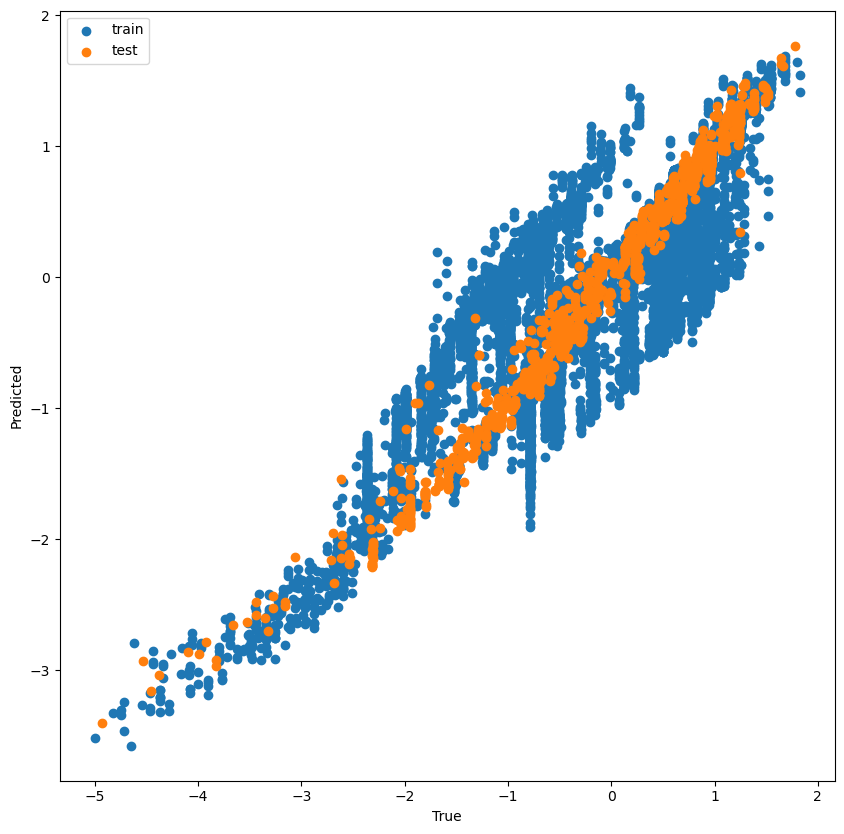

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 10))
plt.scatter(label_list_train, preds_train.detach().numpy(), label="train")
plt.scatter(label_list, preds_test.detach().numpy(), label="test")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.legend()
plt.show()


In [62]:
import pandas as pd 
pd.read_pickle(libe_loc)["shifted_rrho_ev_free_energy"]

12666   -11322.250262
4081     -4216.541351
15379    -9936.445518
12917   -10920.912677
16817    -8964.805534
             ...     
3115     -6456.542504
5398     -4325.154769
13102   -14053.577930
14955   -17358.873445
4171     -4563.803739
Name: shifted_rrho_ev_free_energy, Length: 1716, dtype: float64